In [2]:
import pandas as pd
import numpy as np

In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [4]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv("tags.csv")
tags.head()

,movieId,userId,tag,timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


In [6]:
ratings_mean = ratings.groupby(['movieId'])[['rating']].mean().rename(columns = {'rating': 'mean_rating'}).reset_index()
ratings_mean.head()

,movieId,mean_rating
0,1,3.793347
1,2,3.069892
2,3,2.923077
3,4,2.576923
4,5,2.848684


In [7]:
# Calculating damped mean using alpha = 5
ratings_sum = ratings.groupby(['movieId'])[['rating']].sum().rename(columns = {'rating': 'sum_rating'}).reset_index()
ratings_sum['sum_rating_factor'] = ratings_sum['sum_rating'] + 5*(ratings['rating'].mean())
ratings_sum.head()

,movieId,sum_rating,sum_rating_factor
0,1,1881.5,1899.020312
1,2,856.5,874.020312
2,3,228.0,245.520312
3,4,33.5,51.020312
4,5,216.5,234.020312


In [8]:
ratings_count = ratings.groupby(['movieId'])[['rating']].count().rename(columns = {'rating': 'count_rating'}).reset_index()
ratings_count['count_rating_factor'] = ratings_count['count_rating'] + 5
ratings_count.head()

,movieId,count_rating,count_rating_factor
0,1,496,501
1,2,279,284
2,3,78,83
3,4,13,18
4,5,76,81


In [9]:
ratings_damped = pd.merge(ratings_sum, ratings_count[['movieId','count_rating', 'count_rating_factor']],
                          on=['movieId'], how='left')
ratings_damped['damped_mean'] = ratings_damped['sum_rating_factor']/ratings_damped['count_rating_factor']
ratings_damped.head()

,movieId,sum_rating,sum_rating_factor,count_rating,count_rating_factor,damped_mean
0,1,1881.5,1899.020312,496,501,3.790460
1,2,856.5,874.020312,279,284,3.077536
2,3,228.0,245.520312,78,83,2.958076
3,4,33.5,51.020312,13,18,2.834462
4,5,216.5,234.020312,76,81,2.889140


In [10]:
ratings_mean_dampmean = pd.merge(ratings_mean[['movieId', 'mean_rating']],
                                  ratings_damped[['movieId','damped_mean']], on=['movieId'], how='left')
# Sorting to get top rated movies
ratings_mean_dampmean = ratings_mean_dampmean.sort_values(['mean_rating'], ascending=False)
ratings_mean_dampmean.head()
# Go to slide

,movieId,mean_rating,damped_mean
189,318,4.364362,4.356802
422,858,4.315848,4.306888
632,1248,4.259259,4.195260
1355,2959,4.258503,4.252142
2110,7502,4.247423,4.210983


In [11]:
movie_association = pd.DataFrame(columns=['movieId','movieId1','association'])
distinct_movies = np.unique(ratings['movieId'])
i=1
for movie in distinct_movies[157:158]:
    movie_data = ratings[ratings['movieId'] == movie]
    print 'movie: ', i , 'out of: ', len(distinct_movies)
    j = 1
    for movie1 in distinct_movies:
        movie1_data = ratings[ratings['movieId'] == movie1]
        distinct_cust = len(np.unique(movie_data['userId']))
        movie2_data = movie1_data[movie1_data['userId'].isin(np.unique([movie_data['userId']]))]
        distinct_cust_common = len(np.unique(movie2_data['userId']))
        fraction_common_cust = float(distinct_cust_common)/float(distinct_cust)
        movie_temp=pd.DataFrame(columns=['movieId', 'movieId1' , 'association'])
        movie_temp = movie_temp.append({'movieId': movie, 'movieId1': movie1, 'association': fraction_common_cust}, 
                                       ignore_index=True)
        movie_association = movie_association.append(movie_temp, ignore_index=True)
        if j%500==0:
            print j
        j = j + 1
    i = i + 1
movie_association = movie_association.sort_index(by=['movieId', 'association']).reset_index()

movie:  1 out of:  2500
500
1000
1500
2000
2500


c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [12]:
movie_association.head()
# Go to slide

,index,movieId,movieId1,association
0,202,260.0,340.0,0.005607
1,50,260.0,64.0,0.007477
2,93,260.0,156.0,0.007477
3,165,260.0,275.0,0.009346
4,195,260.0,330.0,0.009346


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
data = pd.read_csv('AirPassengers.csv')
data.columns = ['Month', '#Passengers']
data.head()

,Month,#Passengers
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.head()

,#Passengers
Month,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [5]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
Name: #Passengers, dtype: int64

In [6]:
#explore the various properties date-time based index
from datetime import datetime
print('string key:{0}, Datetime key: {1}'.format(ts['1949-02-01'], ts[datetime(1949,2,1)]))

string key:118, Datetime key: 118


In [7]:
#specify entire range
ts['1949-02-01':'1949-03-10']

Month
1949-02-01    118
1949-03-01    132
Name: #Passengers, dtype: int64

In [8]:
ts['1949']

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

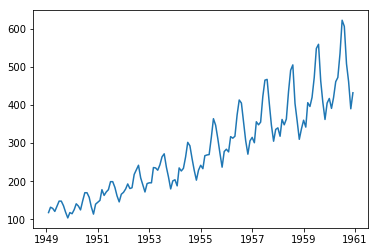

In [9]:
plt.plot(ts)
# Go to slide

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


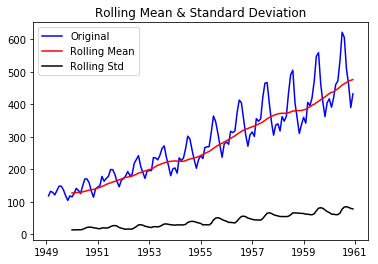

Results of Dickey-Fuller Test:
Test Statistic                   0.792340
p-value                          0.991512
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (5%)             -2.884219
Critical Value (1%)             -3.482088
Critical Value (10%)            -2.578864
dtype: float64


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(ts)
# Go to slide

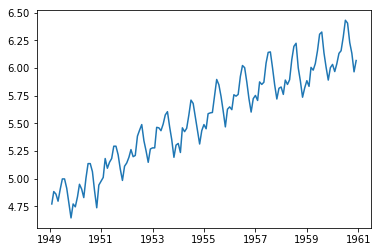

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


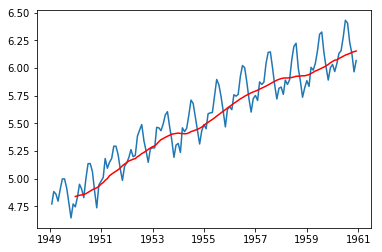

In [12]:
moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [13]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01   -0.093449
Name: #Passengers, dtype: float64

In [14]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
Name: #Passengers, dtype: float64

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


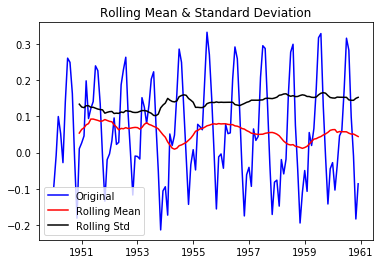

Results of Dickey-Fuller Test:
Test Statistic                  -3.151143
p-value                          0.022993
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (5%)             -2.886363
Critical Value (1%)             -3.487022
Critical Value (10%)            -2.580009
dtype: float64


In [15]:
test_stationarity(ts_log_moving_avg_diff)

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


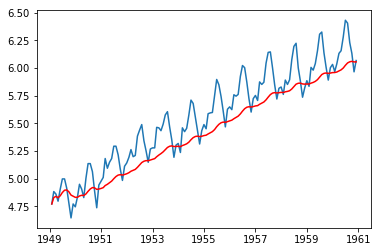

In [16]:
expweighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


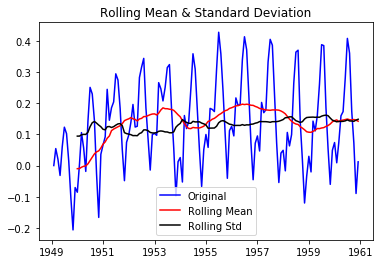

Results of Dickey-Fuller Test:
Test Statistic                  -3.335997
p-value                          0.013344
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (5%)             -2.884219
Critical Value (1%)             -3.482088
Critical Value (10%)            -2.578864
dtype: float64


In [16]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)
#Go to slide

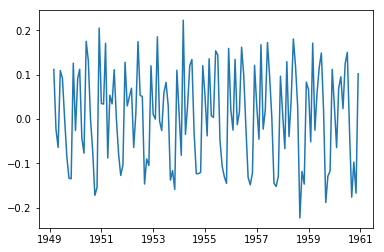

In [17]:
#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


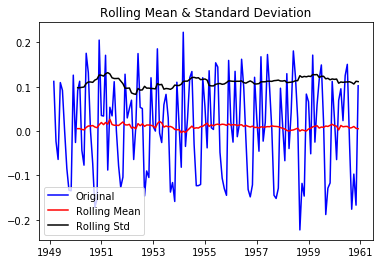

Results of Dickey-Fuller Test:
Test Statistic                  -2.877449
p-value                          0.048034
#Lags Used                      14.000000
Number of Observations Used    127.000000
Critical Value (5%)             -2.884580
Critical Value (1%)             -3.482920
Critical Value (10%)            -2.579058
dtype: float64


In [18]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


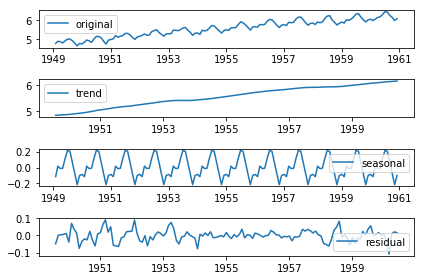

In [19]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

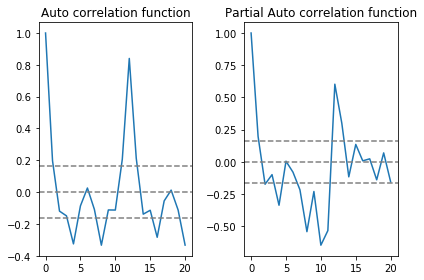

In [20]:
#Go to slide
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Auto correlation function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Auto correlation function')
plt.tight_layout()
#Go to slide

In [1]:
model = ARIMA(ts_log, order=(3, 1, 0))
results_ar = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ar.fittedvalues - ts_log_diff)**2))

NameError: name 'ARIMA' is not defined

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


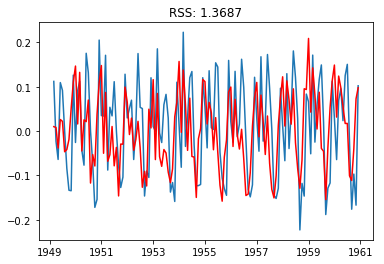

In [22]:
model = ARIMA(ts_log, order=(0, 1, 2))
results_ma = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ma.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ma.fittedvalues - ts_log_diff)**2))

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


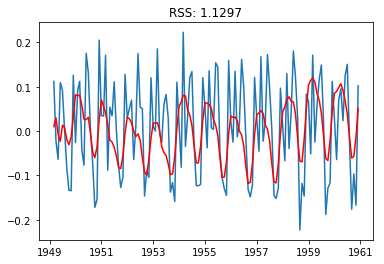

In [23]:
model = ARIMA(ts_log, order=(2, 1, 2))
results_arima = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_arima.fittedvalues - ts_log_diff)**2))

In [24]:
# Go to slide
predictions_arima_diff = pd.Series(results_arima.fittedvalues, copy=True)
predictions_arima_diff.head()

Month
1949-03-01    0.010063
1949-04-01    0.030007
1949-05-01   -0.007356
1949-06-01   -0.022910
1949-07-01    0.013566
dtype: float64

In [25]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

Month
1949-03-01    0.010063
1949-04-01    0.040070
1949-05-01    0.032714
1949-06-01    0.009803
1949-07-01    0.023369
dtype: float64

In [26]:
predictions_arima_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum, fill_value=0)
predictions_arima_log.head()

c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Month
1949-02-01    4.770685
1949-03-01    4.780748
1949-04-01    4.810755
1949-05-01    4.803398
1949-06-01    4.780488
dtype: float64

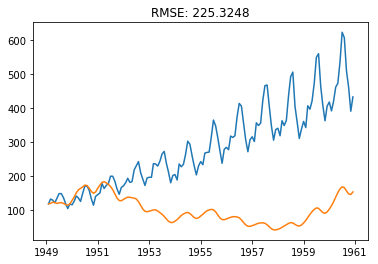

In [27]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(ts)
plt.plot(predictions_arima)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_arima-ts)**2)/len(ts)))